In [1]:
import os
import sys
import random
import json

import cv2
from PIL import Image
import pandas as pd
import numpy as np

from tqdm.notebook import tqdm, trange
import ipyplot as iplt

data_dir = "/data/"

In [2]:
from dotenv import load_dotenv; load_dotenv()
%load_ext sql

In [3]:
df = pd.read_parquet("s3://aisle3-ml-datasets/product-matching/aisle3/main.parquet")
df

,id,variant_id,title,merchant,brand,gender,color,imid,image_url,image,pose,color_pred
0,allsole.10491511,allsole.10491633,Vans Authentic Canvas Trainers,allsole,vans,unisex,Black,26789,https://aisle-3-image-final.s3.eu-west-2.amazo...,s3://aisle-3-image-final/images/original/allso...,side_shot,black
1,allsole.10491511,allsole.10491633,Vans Authentic Canvas Trainers,allsole,vans,unisex,Black,26790,https://aisle-3-image-final.s3.eu-west-2.amazo...,s3://aisle-3-image-final/images/original/allso...,side_shot,black
2,allsole.10491511,allsole.10491633,Vans Authentic Canvas Trainers,allsole,vans,unisex,Black,26791,https://aisle-3-image-final.s3.eu-west-2.amazo...,s3://aisle-3-image-final/images/original/allso...,side_shot,black
3,allsole.10491511,allsole.10491633,Vans Authentic Canvas Trainers,allsole,vans,unisex,Black,26792,https://aisle-3-image-final.s3.eu-west-2.amazo...,s3://aisle-3-image-final/images/original/allso...,upper_shot,black
4,allsole.10491511,allsole.10491633,Vans Authentic Canvas Trainers,allsole,vans,unisex,Black,26793,https://aisle-3-image-final.s3.eu-west-2.amazo...,s3://aisle-3-image-final/images/original/allso...,partial_shot,black
...,...,...,...,...,...,...,...,...,...,...,...,...
215424,ssense.221903M237021,ssense.221903M237021,Coach 1941 Black & Off-White Logo Slide Sandals,ssense,coach,men,Chalk black,95785,https://aisle-3-image-final.s3.eu-west-2.amazo...,s3://aisle-3-image-final/images/original/ssens...,partial_shot,maroon
215425,ssense.221903M237021,ssense.221903M237021,Coach 1941 Black & Off-White Logo Slide Sandals,ssense,coach,men,Chalk black,95786,https://aisle-3-image-final.s3.eu-west-2.amazo...,s3://aisle-3-image-final/images/original/ssens...,pair_shot,white
215426,ssense.221903M237021,ssense.221903M237021,Coach 1941 Black & Off-White Logo Slide Sandals,ssense,coach,men,Chalk black,95787,https://aisle-3-image-final.s3.eu-west-2.amazo...,s3://aisle-3-image-final/images/original/ssens...,side_shot,white
215427,ssense.221903M237021,ssense.221903M237021,Coach 1941 Black & Off-White Logo Slide Sandals,ssense,coach,men,Chalk black,95788,https://aisle-3-image-final.s3.eu-west-2.amazo...,s3://aisle-3-image-final/images/original/ssens...,pair_shot,beige


In [5]:
%%sql result <<
SELECT
    id as imid,
    pose
FROM images_en_new_poses;

215429 rows affected.
Returning data to local variable result


In [6]:
poses = result.DataFrame()
poses

,imid,pose
0,1,side_shot
1,2,pair_shot
2,3,partial_shot
3,4,pair_shot
4,5,side_shot
...,...,...
215424,215425,sole_shot
215425,215426,side_shot
215426,215427,partial_shot
215427,215428,partial_shot


In [7]:
df = df.merge(poses, on="imid")
df

,id,variant_id,title,merchant,brand,gender,color,imid,image_url,image,pose
0,allsole.10491511,allsole.10491633,Vans Authentic Canvas Trainers,allsole,vans,unisex,Black,26789,https://aisle-3-image-final.s3.eu-west-2.amazo...,s3://aisle-3-image-final/images/original/allso...,side_shot
1,allsole.10491511,allsole.10491633,Vans Authentic Canvas Trainers,allsole,vans,unisex,Black,26790,https://aisle-3-image-final.s3.eu-west-2.amazo...,s3://aisle-3-image-final/images/original/allso...,side_shot
2,allsole.10491511,allsole.10491633,Vans Authentic Canvas Trainers,allsole,vans,unisex,Black,26791,https://aisle-3-image-final.s3.eu-west-2.amazo...,s3://aisle-3-image-final/images/original/allso...,side_shot
3,allsole.10491511,allsole.10491633,Vans Authentic Canvas Trainers,allsole,vans,unisex,Black,26792,https://aisle-3-image-final.s3.eu-west-2.amazo...,s3://aisle-3-image-final/images/original/allso...,upper_shot
4,allsole.10491511,allsole.10491633,Vans Authentic Canvas Trainers,allsole,vans,unisex,Black,26793,https://aisle-3-image-final.s3.eu-west-2.amazo...,s3://aisle-3-image-final/images/original/allso...,partial_shot
...,...,...,...,...,...,...,...,...,...,...,...
215424,ssense.221903M237021,ssense.221903M237021,Coach 1941 Black & Off-White Logo Slide Sandals,ssense,coach,men,Chalk black,95785,https://aisle-3-image-final.s3.eu-west-2.amazo...,s3://aisle-3-image-final/images/original/ssens...,partial_shot
215425,ssense.221903M237021,ssense.221903M237021,Coach 1941 Black & Off-White Logo Slide Sandals,ssense,coach,men,Chalk black,95786,https://aisle-3-image-final.s3.eu-west-2.amazo...,s3://aisle-3-image-final/images/original/ssens...,pair_shot
215426,ssense.221903M237021,ssense.221903M237021,Coach 1941 Black & Off-White Logo Slide Sandals,ssense,coach,men,Chalk black,95787,https://aisle-3-image-final.s3.eu-west-2.amazo...,s3://aisle-3-image-final/images/original/ssens...,side_shot
215427,ssense.221903M237021,ssense.221903M237021,Coach 1941 Black & Off-White Logo Slide Sandals,ssense,coach,men,Chalk black,95788,https://aisle-3-image-final.s3.eu-west-2.amazo...,s3://aisle-3-image-final/images/original/ssens...,pair_shot


In [8]:
df.isna().value_counts()

id     variant_id  title  merchant  brand  gender  color  imid   image_url  image  pose 
False  False       False  False     False  False   False  False  False      False  False    215429
dtype: int64

In [9]:
frame = df.sample(frac=1.0).reset_index(drop=True)
iplt.plot_class_tabs(
    frame.image_url,
    frame.pose,
    show_url=False,
    custom_texts=frame.id,
    max_imgs_per_tab=100,
)


<AxesSubplot:>

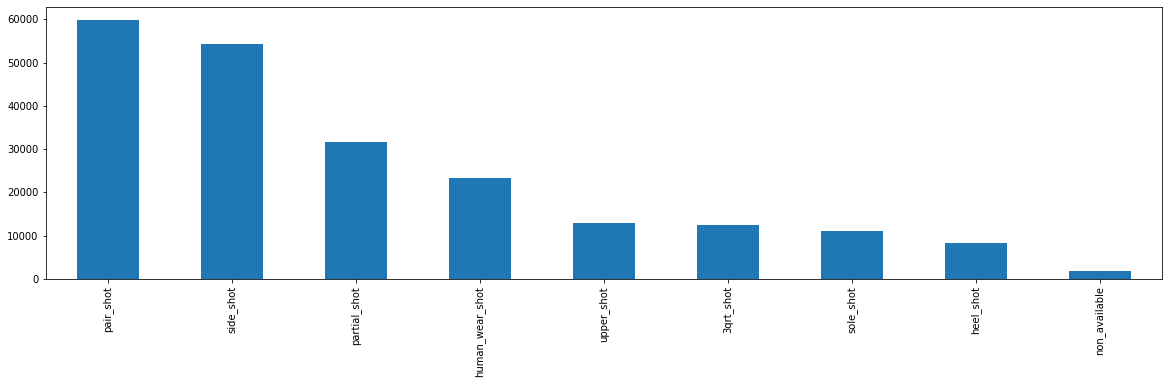

In [10]:
df.pose.value_counts().plot.bar(figsize=(20, 5))

### save pose information to the main dataframe

In [11]:
df.to_parquet("s3://aisle3-ml-datasets/product-matching/aisle3/main.parquet")

## drop non-informative poses

total ids: 45884
samples / id :


1      1917
2       437
3      1827
4     17140
5     13516
6      8595
7      1206
8       602
9       406
10      138
11       61
12       28
13        6
14        5
Name: id, dtype: int64

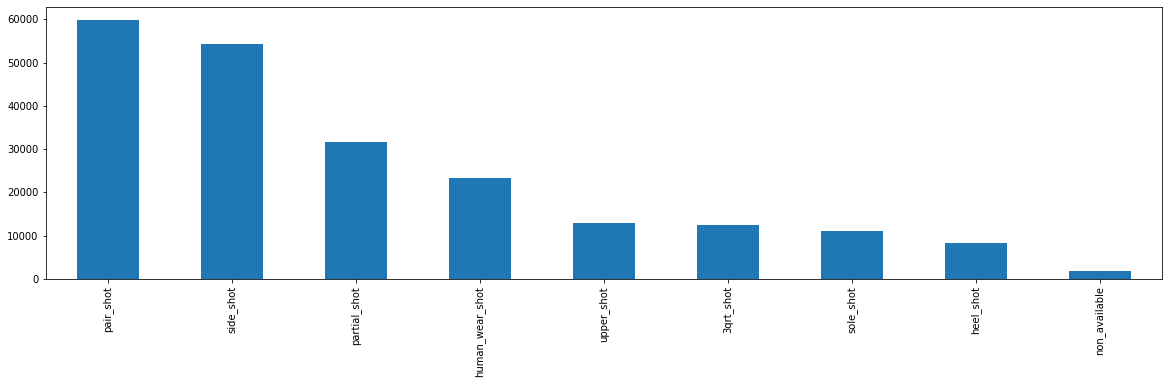

In [13]:
df.pose.value_counts().plot.bar(figsize=(20, 5))
print("total ids:", df.id.nunique())
print("samples / id :")
df.id.value_counts().value_counts().sort_index()

In [14]:
poses_to_drop = {
    "sole_shot",
    "non_available",
}
df = df[~df.pose.isin(poses_to_drop)].reset_index(drop=True)

total ids: 45814
samples / id :


1      2173
2      1503
3      2314
4     18077
5     15618
6      4087
7      1316
8       419
9       181
10       74
11       40
12       10
13        2
Name: id, dtype: int64

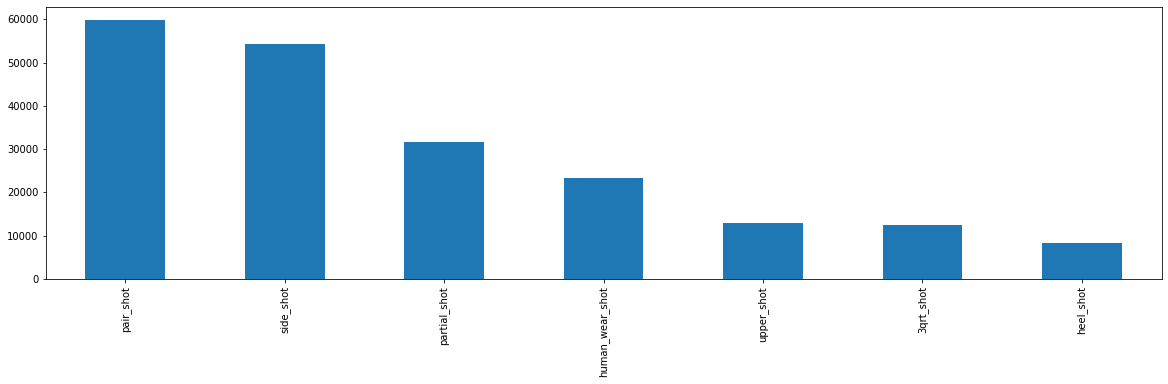

In [15]:
df.pose.value_counts().plot.bar(figsize=(20, 5))
print("total ids:", df.id.nunique())
print("samples / id :")
df.id.value_counts().value_counts().sort_index()

In [16]:
df.to_parquet("s3://aisle3-ml-datasets/product-matching/aisle3/clean_poses.parquet")